In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [ ]:
def make_data(split):

  start = 0
  end = 1
  step = 0.06

  weight=0.3
  bias = 0.9

  X = torch.arange(start,end,step,dtype=torch.float32)
  y = X*weight + bias

  train_split = int(split*(len(X)))
  X_train = X[:train_split]
  y_train = y[:train_split]
  X_test = X[train_split:]
  y_test = y[train_split:]



  return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = make_data(0.8)


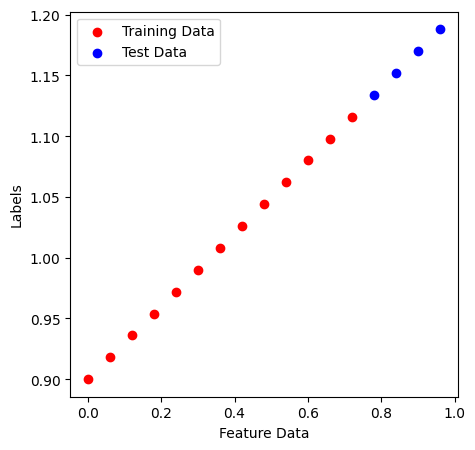

In [ ]:
import matplotlib.pyplot as plt

def plot_data(X_train, y_train, X_test, y_test,predictions = None,y_pred = None):
    plt.figure(figsize=(5, 5))

    # Plot training data
    plt.scatter(X_train, y_train, color="red", label="Training Data")

    # Plot test data
    plt.scatter(X_test, y_test, color="blue", label="Test Data")

    if predictions is not None:
      plt.scatter(X_test,y_pred,color = "green",label = "Predictions")

    # Add labels and legend
    plt.xlabel("Feature Data")
    plt.ylabel("Labels")
    plt.legend()  # Show the legend to differentiate training and test data

    # Show the plot
    plt.show()

# Example usage
plot_data(X_train, y_train, X_test, y_test)


In [ ]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights = nn.Parameter(torch.randn(1),requires_grad = True)
    self.bias = nn.Parameter(torch.randn(1),requires_grad = True)

  def forward(self,X):
    return self.weights*X+self.bias



In [ ]:
lr = LinearRegression()
with torch.inference_mode():
  y_pred = lr(X_test)
print((y_pred-y_test).mean())

tensor(-2.3242)


In [ ]:
y_pred = lr.forward(X_test)
print((y_pred-y_test).mean())

tensor(-2.3242, grad_fn=<MeanBackward0>)


In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = lr.parameters(),lr = 0.001)


epoch = 2000

epoch_count =[]
test_loss_count =[]
train_loss_count = []

for epoch in range(epoch+1):
  lr.train()

  y_pred = lr.forward(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  lr.eval()

  with torch.inference_mode():
    pred = lr(X_test)
    test_loss = loss_fn(pred,y_test)

  if epoch%10 ==0:
    epoch_count.append(epoch)
    test_loss_count.append(test_loss)
    train_loss_count.append(loss)

    print(f"Epoch:{epoch}|MAE_train_loss:{loss}|MAE_test_loss:{test_loss}")







Epoch:0|MAE_train_loss:0.010238051414489746|MAE_test_loss:0.010559260845184326
Epoch:10|MAE_train_loss:0.0010578724322840571|MAE_test_loss:5.364418029785156e-05
Epoch:20|MAE_train_loss:0.0010578724322840571|MAE_test_loss:5.364418029785156e-05
Epoch:30|MAE_train_loss:0.0010578724322840571|MAE_test_loss:5.364418029785156e-05
Epoch:40|MAE_train_loss:0.0010578724322840571|MAE_test_loss:5.364418029785156e-05
Epoch:50|MAE_train_loss:0.0010578724322840571|MAE_test_loss:5.364418029785156e-05
Epoch:60|MAE_train_loss:0.0010578724322840571|MAE_test_loss:5.364418029785156e-05
Epoch:70|MAE_train_loss:0.0010578724322840571|MAE_test_loss:5.364418029785156e-05
Epoch:80|MAE_train_loss:0.0010578724322840571|MAE_test_loss:5.364418029785156e-05
Epoch:90|MAE_train_loss:0.0010578724322840571|MAE_test_loss:5.364418029785156e-05
Epoch:100|MAE_train_loss:0.0010578724322840571|MAE_test_loss:5.364418029785156e-05
Epoch:110|MAE_train_loss:0.0010578724322840571|MAE_test_loss:5.364418029785156e-05
Epoch:120|MAE_tra

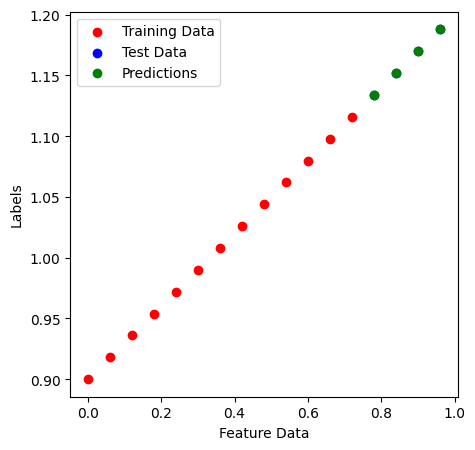

In [ ]:
y_pred = lr.forward(X_test)
y_pred_np = y_pred.detach().numpy()
plot_data(X_train, y_train, X_test, y_test,y_pred = y_pred_np,predictions = 2)




In [ ]:
lr.state_dict()

OrderedDict([('weights', tensor([0.3000])), ('bias', tensor([0.9001]))])